In [3]:
# -*- coding: utf-8 -*-
"""
Author: Mayank Kunwar
Find Me: https://in.linkedin.com/in/mayankkunwar93
"""

'\nAuthor: Mayank Kunwar\nFind Me: https://in.linkedin.com/in/mayankkunwar93\n'

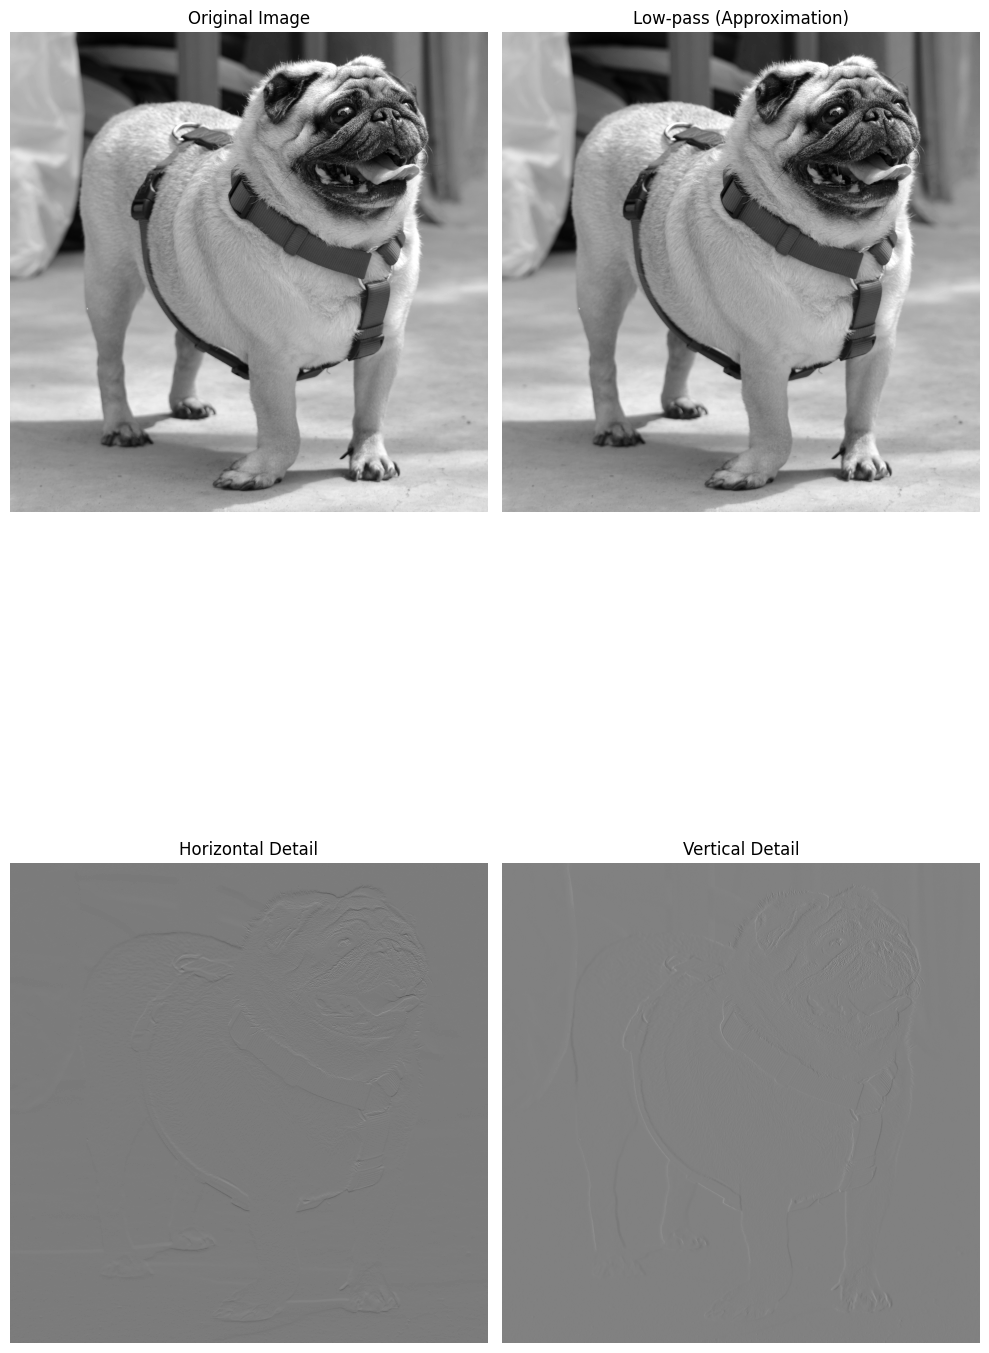

In [33]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import pywt

# Step 1: Load and preprocess the image
image_path = '/content/test_image_2.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
transform = transforms.ToTensor()
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Step 2: Wavelet Transform using PyWavelets
def wavelet_transform(image_tensor, wavelet='haar'):
    # Convert tensor to numpy array
    image_np = image_tensor.numpy()[0]

    # Perform 2D wavelet transform
    coeffs = pywt.dwt2(image_np, wavelet)
    LL, (LH, HL, HH) = coeffs  # LL: approximation, LH/HL/HH: details

    # Convert arrays back to tensors
    LL_tensor = torch.tensor(LL, dtype=torch.float32).unsqueeze(0)
    LH_tensor = torch.tensor(LH, dtype=torch.float32).unsqueeze(0)
    HL_tensor = torch.tensor(HL, dtype=torch.float32).unsqueeze(0)
    HH_tensor = torch.tensor(HH, dtype=torch.float32).unsqueeze(0)

    return LL_tensor, LH_tensor, HL_tensor, HH_tensor

LL, LH, HL, HH = wavelet_transform(image_tensor)

# Step 3: Plotting the results
plt.figure(figsize=(10, 20))

# Plotting original image
plt.subplot(2, 2, 1)
plt.imshow(image_tensor.numpy()[0, 0], cmap='gray')  # Convert tensor back to numpy array
plt.title('Original Image')
plt.axis('off')

# Plotting low-frequency (approximation) component
plt.subplot(2, 2, 2)
plt.imshow(LL.numpy()[0, 0], cmap='gray')  # Squeeze out the batch and channel dimensions
plt.title('Low-pass (Approximation)')
plt.axis('off')

# Plotting high-frequency (detail) components
plt.subplot(2, 2, 3)
plt.imshow(LH.numpy()[0, 0], cmap='gray')
plt.title('Horizontal Detail')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HL.numpy()[0, 0], cmap='gray')
plt.title('Vertical Detail')
plt.axis('off')

plt.tight_layout()
plt.show()
